<h1>데이터 그룹화</h1>

<h3><font color='orange'>데이터 그룹화</h3>

In [4]:
import pandas as pd
import numpy as np

In [6]:
payment = pd.read_csv('./../data/payment07.csv', encoding='cp949')
payment['성별'].unique()

array(['남자', '여자'], dtype=object)

In [7]:
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
1,서문덕,서울,6,영업부,남자,3000,3000
2,이성진,부산,5,영업부,남자,3000,3000
3,강찬혁,부산,3,영업부,남자,1000,2000
4,신유석,서울,5,전산부,여자,2000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
6,이유리,부산,8,전산부,여자,4000,1000
7,선진희,부산,6,전산부,여자,1000,4000


In [9]:
mygrouping = payment.groupby('성별')['교통비']
mygrouping.sum()

성별
남자    11000
여자    11000
Name: 교통비, dtype: int64

In [10]:
mygrouping.count()

성별
남자    4
여자    4
Name: 교통비, dtype: int64

In [11]:
result = payment.groupby('성별')['출장기간'].agg('mean')
result.to_frame()

,출장기간
성별,
남자,5.25
여자,6.00


In [14]:
result = payment.groupby('성별').agg({'출장기간':'mean'})
result

,출장기간
성별,
남자,5.25
여자,6.00


In [15]:
result = payment.groupby('성별')['출장기간'].agg(np.mean)
result.to_frame()

,출장기간
성별,
남자,5.25
여자,6.00


In [16]:
payment['출장지역'].unique()

array(['서울', '부산'], dtype=object)

In [19]:
result = payment.groupby(['출장지역','성별'])['교통비'].agg('sum')
result.to_frame()

교통비
출장지역 성별      
부산   남자  4000
     여자  5000
서울   남자  7000
     여자  6000

In [24]:
result = payment.groupby(['출장지역','성별'])[['교통비','출장기간']].agg(['sum','mean'])
result

교통비         출장기간     
          sum    mean  sum mean
출장지역 성별                        
부산   남자  4000  2000.0    8  4.0
     여자  5000  2500.0   14  7.0
서울   남자  7000  3500.0   13  6.5
     여자  6000  3000.0   10  5.0

In [31]:
result = payment.groupby(['출장지역','성별']).agg({'교통비':['sum','mean','max'], '출장기간':['mean','min']}).astype(int)

result

교통비             출장기간    
          sum  mean   max mean min
출장지역 성별                           
부산   남자  4000  2000  3000    4   3
     여자  5000  2500  4000    7   6
서울   남자  7000  3500  4000    6   6
     여자  6000  3000  4000    5   5

In [32]:
mydict = {'교통비':['sum','mean','max'], '출장기간':['mean','min']}

result = payment.groupby(['출장지역','성별']).agg(mydict).astype(int)

result

교통비             출장기간    
          sum  mean   max mean min
출장지역 성별                           
부산   남자  4000  2000  3000    4   3
     여자  5000  2500  4000    7   6
서울   남자  7000  3500  4000    6   6
     여자  6000  3000  4000    5   5

<h1>중첩 색인 제거</h1>

<h3><font color='orange'>데이터 확인</h3>

In [33]:
import pandas as pd
import numpy as np

In [34]:
payment = pd.read_csv('./../data/payment07.csv', encoding='cp949')

agg_dict = {'교통비':['sum','mean','max'], '출장기간':['mean','min']}

groupdata = payment.groupby(['출장지역','성별']).agg(agg_dict).astype(int)

groupdata

교통비             출장기간    
          sum  mean   max mean min
출장지역 성별                           
부산   남자  4000  2000  3000    4   3
     여자  5000  2500  4000    7   6
서울   남자  7000  3500  4000    6   6
     여자  6000  3000  4000    5   5

In [35]:
print('열 색인 정보')
print(groupdata.columns)

열 색인 정보
MultiIndex([( '교통비',  'sum'),
            ( '교통비', 'mean'),
            ( '교통비',  'max'),
            ('출장기간', 'mean'),
            ('출장기간',  'min')],
           )


In [36]:
print('행 색인 정보')
print(groupdata.index)

행 색인 정보
MultiIndex([('부산', '남자'),
            ('부산', '여자'),
            ('서울', '남자'),
            ('서울', '여자')],
           names=['출장지역', '성별'])


In [37]:
outer_column = groupdata.columns.get_level_values(0)
outer_column

Index(['교통비', '교통비', '교통비', '출장기간', '출장기간'], dtype='object')

In [38]:
hangul_dict = {'sum':'총합', 'mean':'평균', 'max':'최대', 'min':'최소'}

inner_column = groupdata.columns.get_level_values(1)
inner_column

Index(['sum', 'mean', 'max', 'mean', 'min'], dtype='object')

<h3><font color='orange'>중첩 색인의 단일화</h3>

In [39]:
groupdata.columns = outer_column + '_' + inner_column
groupdata.columns

Index(['교통비_sum', '교통비_mean', '교통비_max', '출장기간_mean', '출장기간_min'], dtype='object')

In [40]:
groupdata.reset_index().head()

,출장지역,성별,교통비_sum,교통비_mean,교통비_max,출장기간_mean,출장기간_min
0,부산,남자,4000,2000,3000,4,3
1,부산,여자,5000,2500,4000,7,6
2,서울,남자,7000,3500,4000,6,6
3,서울,여자,6000,3000,4000,5,5


<h1>agg() 함수 커스터마이징</h1>

<h3><font color='orange'>그룹별 비율 함수</h3>

In [41]:
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
1,서문덕,서울,6,영업부,남자,3000,3000
2,이성진,부산,5,영업부,남자,3000,3000
3,강찬혁,부산,3,영업부,남자,1000,2000
4,신유석,서울,5,전산부,여자,2000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
6,이유리,부산,8,전산부,여자,4000,1000
7,선진희,부산,6,전산부,여자,1000,4000


<h3><font color='orange'>함수 만들기</h3>

In [42]:
def get_range(x):
    return x.between(1500,3500).mean()

In [43]:
result = payment.groupby(['성별'])['교통비'].agg(get_range)
result

성별
남자    0.50
여자    0.25
Name: 교통비, dtype: float64

<h3><font color='orange'>범용적 함수 만들기</h3>

In [44]:
def get_range_pct(x, lower, upper) :
    return x.between(lower, upper).mean()

In [45]:
LOWER, UPPER = 1500, 3500

# positional arguments
result = payment.groupby(['성별'])['교통비'].agg(get_range_pct, LOWER, UPPER)
result.to_frame()

,교통비
성별,
남자,0.50
여자,0.25


In [46]:
# keyword arguments
result = payment.groupby(['성별'])['교통비'].agg(get_range_pct, lower=LOWER, upper=UPPER)
result.to_frame()

,교통비
성별,
남자,0.50
여자,0.25


<h1>groupby 객체 살펴보기</h1>

In [52]:
group_col = ['출장지역','성별','교통비']
grouped = payment.groupby(group_col)
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [49]:
# dir(grouped)

In [56]:
attrlist = [attr for attr in dir(grouped.groups) if not attr.startswith('_')]
attrlist

['clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [57]:
str(grouped.ngroups)

'8'

In [58]:
grouped.groups

{('부산', '남자', 1000): [3], ('부산', '남자', 3000): [2], ('부산', '여자', 1000): [7], ('부산', '여자', 4000): [6], ('서울', '남자', 3000): [1], ('서울', '남자', 4000): [0], ('서울', '여자', 2000): [4], ('서울', '여자', 4000): [5]}

In [59]:
payment[group_col]

,출장지역,성별,교통비
0,서울,남자,4000
1,서울,남자,3000
2,부산,남자,3000
3,부산,남자,1000
4,서울,여자,2000
5,서울,여자,4000
6,부산,여자,4000
7,부산,여자,1000


In [60]:
result = grouped.get_group(('부산','남자',1000))
result

,사원명,출장지역,출장기간,부서,성별,교통비,식비
3,강찬혁,부산,3,영업부,남자,1000,2000


In [61]:
type(result)

pandas.core.frame.DataFrame

In [64]:
groups = list(grouped.groups.keys())
groups

[('부산', '남자', 1000),
 ('부산', '남자', 3000),
 ('부산', '여자', 1000),
 ('부산', '여자', 4000),
 ('서울', '남자', 3000),
 ('서울', '남자', 4000),
 ('서울', '여자', 2000),
 ('서울', '여자', 4000)]

In [65]:
result = grouped.get_group(('부산','남자',1000))
result

,사원명,출장지역,출장기간,부서,성별,교통비,식비
3,강찬혁,부산,3,영업부,남자,1000,2000


In [66]:
cnt = 0

for key,value in grouped:
    print('키 :', end='')
    print(key)
    print('값 : \n', end='')
    print(value)
    cnt += 1
    if(cnt==3): break
    print('\n')
# end for

키 :('부산', '남자', 1000)
값 : 
   사원명 출장지역  출장기간   부서  성별   교통비    식비
3  강찬혁   부산     3  영업부  남자  1000  2000


키 :('부산', '남자', 3000)
값 : 
   사원명 출장지역  출장기간   부서  성별   교통비    식비
2  이성진   부산     5  영업부  남자  3000  3000


키 :('부산', '여자', 1000)
값 : 
   사원명 출장지역  출장기간   부서  성별   교통비    식비
7  선진희   부산     6  전산부  여자  1000  4000


<h1>시험 성적 향상표 읽기</h1>

In [80]:
import pandas as pd
import numpy as np

In [81]:
jumsu_score = pd.read_csv('./../data/시험성적향상표.csv', encoding='cp949')
print(jumsu_score.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      32 non-null     object
 1   월       32 non-null     object
 2   주       32 non-null     object
 3   점수      32 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ KB
None


In [82]:
jumsu_score.head(10)

,이름,월,주,점수
0,김철수,1월,1주차,64
1,김철수,1월,2주차,65
2,김철수,1월,3주차,67
3,김철수,1월,4주차,67
4,김철수,2월,1주차,61
5,김철수,2월,2주차,62
6,김철수,2월,3주차,63
7,김철수,2월,4주차,64
8,김철수,3월,1주차,55
9,김철수,3월,2주차,55


In [83]:
result = jumsu_score.query('월 == "1월"')
result

,이름,월,주,점수
0,김철수,1월,1주차,64
1,김철수,1월,2주차,65
2,김철수,1월,3주차,67
3,김철수,1월,4주차,67
16,박영희,1월,1주차,78
17,박영희,1월,2주차,79
18,박영희,1월,3주차,81
19,박영희,1월,4주차,82


In [84]:
man = jumsu_score.query('이름=="김철수" and 월 in ["1월"]')
man

,이름,월,주,점수
0,김철수,1월,1주차,64
1,김철수,1월,2주차,65
2,김철수,1월,3주차,67
3,김철수,1월,4주차,67


In [85]:
man['점수'].to_frame()

,점수
0,64
1,65
2,67
3,67


In [92]:
def jumsu_rate(jumsu):
    # x는 매주의 시험 점수, x.iloc[0]는 첫 주의 시험 점수
    return 100 * (jumsu - jumsu.iloc[0]) / jumsu.iloc[0]

In [93]:
result = jumsu_rate(man['점수'])
result.to_frame()

,점수
0,0.0000
1,1.5625
2,4.6875
3,4.6875


In [94]:
pct_jumsu_score = jumsu_score.groupby(['이름','월'])['점수'].transform(jumsu_rate)
result = pct_jumsu_score.head(8)
result.to_frame()

,점수
0,0.000000
1,1.562500
2,4.687500
3,4.687500
4,0.000000
5,1.639344
6,3.278689
7,4.918033


In [95]:
jumsu_score['향상_비율'] = pct_jumsu_score.round(4)
result = jumsu_score.query('이름=="김철수"')
result.head(8)

,이름,월,주,점수,향상_비율
0,김철수,1월,1주차,64,0.0000
1,김철수,1월,2주차,65,1.5625
2,김철수,1월,3주차,67,4.6875
3,김철수,1월,4주차,67,4.6875
4,김철수,2월,1주차,61,0.0000
5,김철수,2월,2주차,62,1.6393
6,김철수,2월,3주차,63,3.2787
7,김철수,2월,4주차,64,4.9180


In [96]:
week4 = jumsu_score.query('주=="4주차"')
week4

,이름,월,주,점수,향상_비율
3,김철수,1월,4주차,67,4.6875
7,김철수,2월,4주차,64,4.9180
11,김철수,3월,4주차,55,0.0000
15,김철수,4월,4주차,54,1.8868
19,박영희,1월,4주차,82,5.1282
23,박영희,2월,4주차,89,5.9524
27,박영희,3월,4주차,84,2.4390
31,박영희,4월,4주차,88,3.5294


In [98]:
week4copy = week4.copy()
month_unique = week4copy['월'].unique()
print(month_unique)

['1월' '2월' '3월' '4월']


In [99]:
str(week4copy['월'].dtypes)

'object'

In [100]:
winner = week4copy.pivot(index='월', columns='이름', values='향상_비율')
winner

이름,김철수,박영희
월,,
1월,4.6875,5.1282
2월,4.9180,5.9524
3월,0.0000,2.4390
4월,1.8868,3.5294


In [101]:
winner['성적우수자'] = np.where(winner['김철수'] > winner['박영희'], '김철수','박영희')
winner

이름,김철수,박영희,성적우수자
월,,,
1월,4.6875,5.1282,박영희
2월,4.9180,5.9524,박영희
3월,0.0000,2.4390,박영희
4월,1.8868,3.5294,박영희


<h1>연속형 변수의 범주화와 그룹핑</h1>

In [107]:
welfare = pd.read_csv('./../data/welfareCleanNew.csv', encoding='cp949')
welfare.columns

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대',
       '점수', '신용'],
      dtype='object')

In [118]:
welfare['결혼 유무'].unique()

array(['무응답', '이혼', '결혼'], dtype=object)

In [119]:
chartdata = welfare.groupby('결혼 유무')['소득'].mean()
chartdata.to_frame()

,소득
결혼 유무,
결혼,259.935812
무응답,198.124863
이혼,196.780643


In [120]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

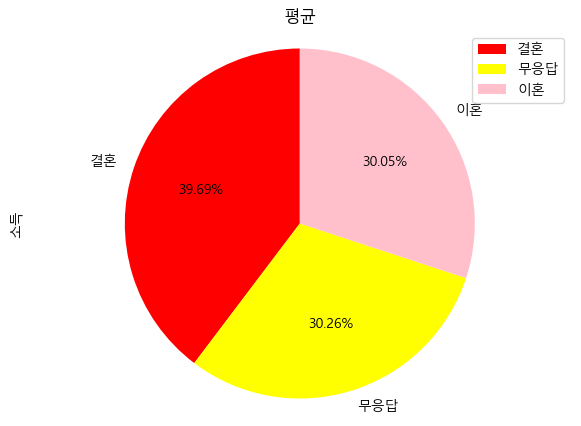

In [134]:
chartdata.plot(kind='pie', figsize=(7,5), autopct='%1.2f%%', startangle=90, colors=['red','yellow','pink'])

plt.title('평균')
plt.axis('equal')
plt.legend(labels=chartdata.index, loc='upper right')

Text(0.5, 1.0, '산점도 : 소득 vs 나이')

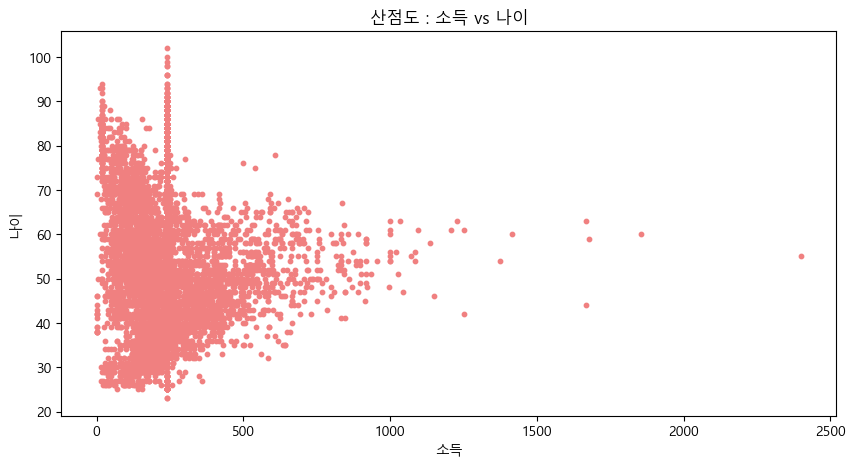

In [135]:
welfare.plot(kind='scatter', x='소득', y='나이', c='LightCoral', s=10, figsize=(10,5))
plt.title('산점도 : 소득 vs 나이')

Text(0.5, 1.0, '결혼 유무별 소득(박스 플롯)')

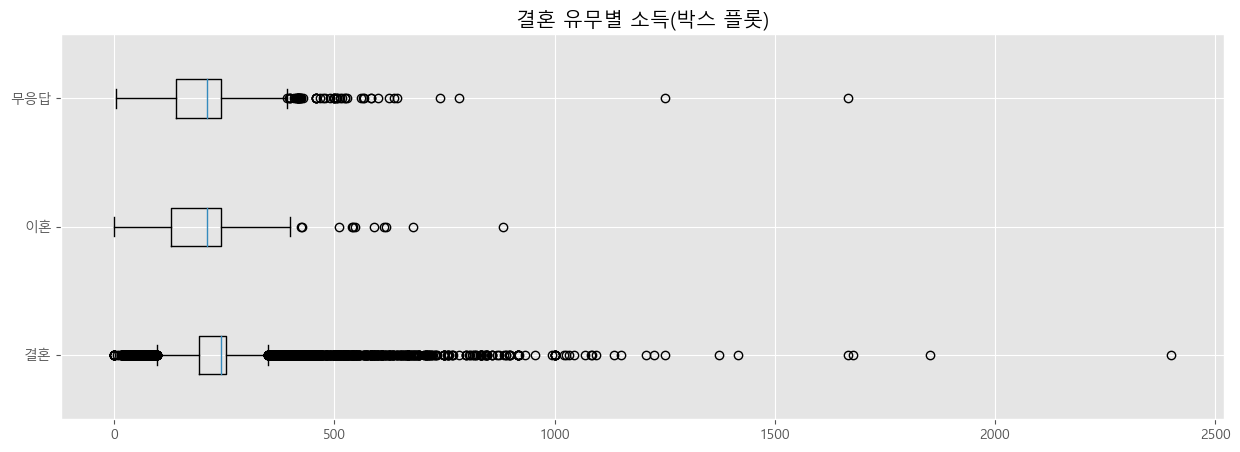

In [139]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.boxplot(x=[welfare[welfare['결혼 유무']=='결혼']['소득'],
               welfare[welfare['결혼 유무']=='이혼']['소득'],
               welfare[welfare['결혼 유무']=='무응답']['소득']],
               labels=['결혼','이혼','무응답'], vert=False)
              
plt.title('결혼 유무별 소득(박스 플롯)')

In [142]:
welfare['소득'].describe().to_frame()

,소득
count,7529.000000
mean,241.619016
std,144.679991
min,0.000000
25%,162.600000
50%,241.619016
75%,241.619016
max,2400.000000


In [144]:
welfare['소득'].sort_values(ascending=False).head(20).to_frame()

,소득
881,2400.00
7136,1853.30
7250,1678.70
5484,1666.70
2409,1666.66
4740,1416.70
5488,1374.00
5485,1250.00
7526,1250.00
4747,1226.70


In [145]:
len(welfare)

7529

In [147]:
welfare = welfare.loc[welfare['소득'] <= 1200]
welfare

,성별,생일,결혼 유무,종교 유무,직업 코드,소득,지역구,나이,직업,연령대,점수,신용
0,남성,1948,무응답,없슴,942,120.000000,서울,73,경비원 및 검표원,노년,7.9,128.0
1,남성,1945,이혼,없슴,942,220.200000,서울,76,경비원 및 검표원,노년,7.1,111.0
2,남성,1946,결혼,없슴,942,139.000000,서울,75,경비원 및 검표원,노년,6.8,139.0
3,남성,1953,결혼,없슴,942,150.000000,서울,68,경비원 및 검표원,노년,8.5,126.0
4,남성,1960,결혼,있슴,942,166.000000,서울,61,경비원 및 검표원,노년,7.1,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7523,여성,1937,무응답,있슴,819,241.619016,수도권,84,기타 식품가공관련 기계조작원,노년,7.1,60.0
7524,여성,1950,결혼,있슴,819,241.619016,강원/충북,71,기타 식품가공관련 기계조작원,노년,6.6,66.0
7525,남성,1960,결혼,있슴,111,250.000000,광주/전남/전북/제주도,61,의회의원 고위공무원 및 공공단체임원,노년,6.1,110.0
7527,남성,1992,무응답,있슴,876,280.000000,부산/경남/울산,29,선박 갑판승무원 및 관련 종사원,청년,8.1,84.0


In [148]:
len(welfare)

7518

Text(0.5, 0, '소득')

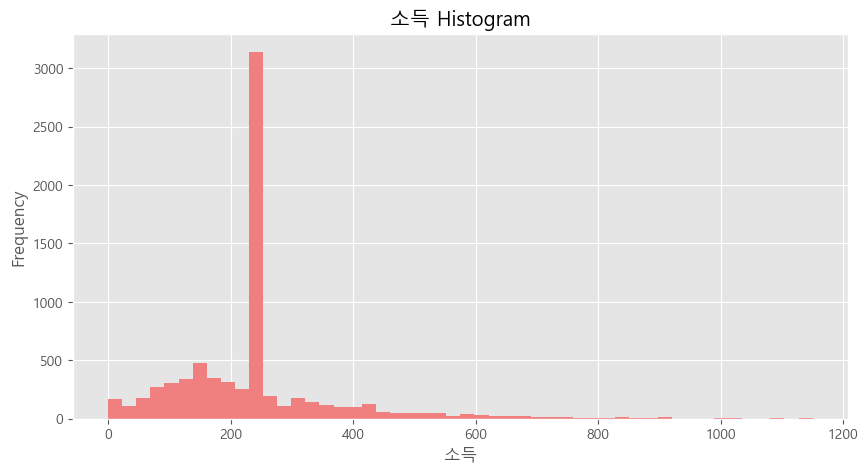

In [149]:
welfare['소득'].plot(kind='hist', bins=50, color='LightCoral', figsize=(10,5))
plt.title('소득 Histogram')
plt.xlabel('소득')

In [150]:
print(welfare['소득'].max())
print(welfare['소득'].min())

1150.0
0.0


In [151]:
bins = [-np.inf, 200, 500, 700, 1000, np.inf]
cuts = pd.cut(welfare['소득'], bins=bins)
cuts.head()

0     (-inf, 200.0]
1    (200.0, 500.0]
2     (-inf, 200.0]
3     (-inf, 200.0]
4     (-inf, 200.0]
Name: 소득, dtype: category
Categories (5, interval[float64, right]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 700.0] < (700.0, 1000.0] < (1000.0, inf]]

In [152]:
cuts.value_counts().to_frame()

,소득
"(200.0, 500.0]",4657
"(-inf, 200.0]",2473
"(500.0, 700.0]",280
"(700.0, 1000.0]",98
"(1000.0, inf]",10


In [153]:
result = 100 * welfare.groupby(cuts)['성별'].value_counts(normalize=True).round(4)
result.to_frame()

성별
소득              성별        
(-inf, 200.0]   여성   68.62
                남성   31.38
(200.0, 500.0]  남성   62.47
                여성   37.53
(500.0, 700.0]  남성   83.57
                여성   16.43
(700.0, 1000.0] 남성   89.80
                여성   10.20
(1000.0, inf]   남성  100.00

In [157]:
labels = ['저소득','중저소득','중중소득','중고소득','고소득']
cuts_label = pd.cut(welfare['소득'], bins=bins, labels=labels)

strincome = '범주형소득'
welfare[strincome] = cuts_label
welfare[['성별', '지역구', '나이', '소득', strincome]].head()

,성별,지역구,나이,소득,범주형소득
0,남성,서울,73,120.0,저소득
1,남성,서울,76,220.2,중저소득
2,남성,서울,75,139.0,저소득
3,남성,서울,68,150.0,저소득
4,남성,서울,61,166.0,저소득


In [158]:
chartdata = welfare.groupby('지역구')['소득'].mean()
chartdata.to_frame()

,소득
지역구,
강원/충북,221.955189
광주/전남/전북/제주도,234.901742
대구/경북,227.682571
대전/충남,254.458744
부산/경남/울산,251.044213
서울,246.926482
수도권,237.071017


Text(0.5, 0, '소득 평균')

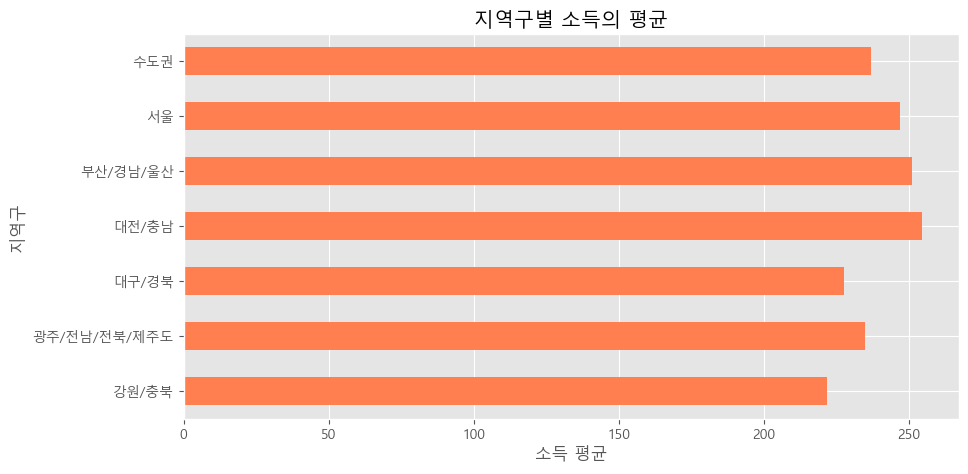

In [159]:
plt.style.use('ggplot')
chartdata.plot(kind='barh', color='Coral', width=0.5, figsize=(10,5))
plt.title('지역구별 소득의 평균')
plt.ylabel('지역구')
plt.xlabel('소득 평균')

In [161]:
chartdata = welfare.groupby(['성별','범주형소득'])['소득'].mean().to_frame()
type(chartdata)
chartdata=chartdata.reset_index()
chartdata

,성별,범주형소득,소득
0,남성,저소득,132.813144
1,남성,중저소득,277.966875
2,남성,중중소득,586.030470
3,남성,중고소득,820.022273
4,남성,고소득,1074.030000
5,여성,저소득,114.459034
6,여성,중저소득,252.843971
7,여성,중중소득,563.363261
8,여성,중고소득,833.383000
9,여성,고소득,NaN


In [162]:
chartdata = chartdata.pivot(index='성별', columns='범주형소득', values='소득')
chartdata

범주형소득,저소득,중저소득,중중소득,중고소득,고소득
성별,,,,,
남성,132.813144,277.966875,586.030470,820.022273,1074.03
여성,114.459034,252.843971,563.363261,833.383000,NaN


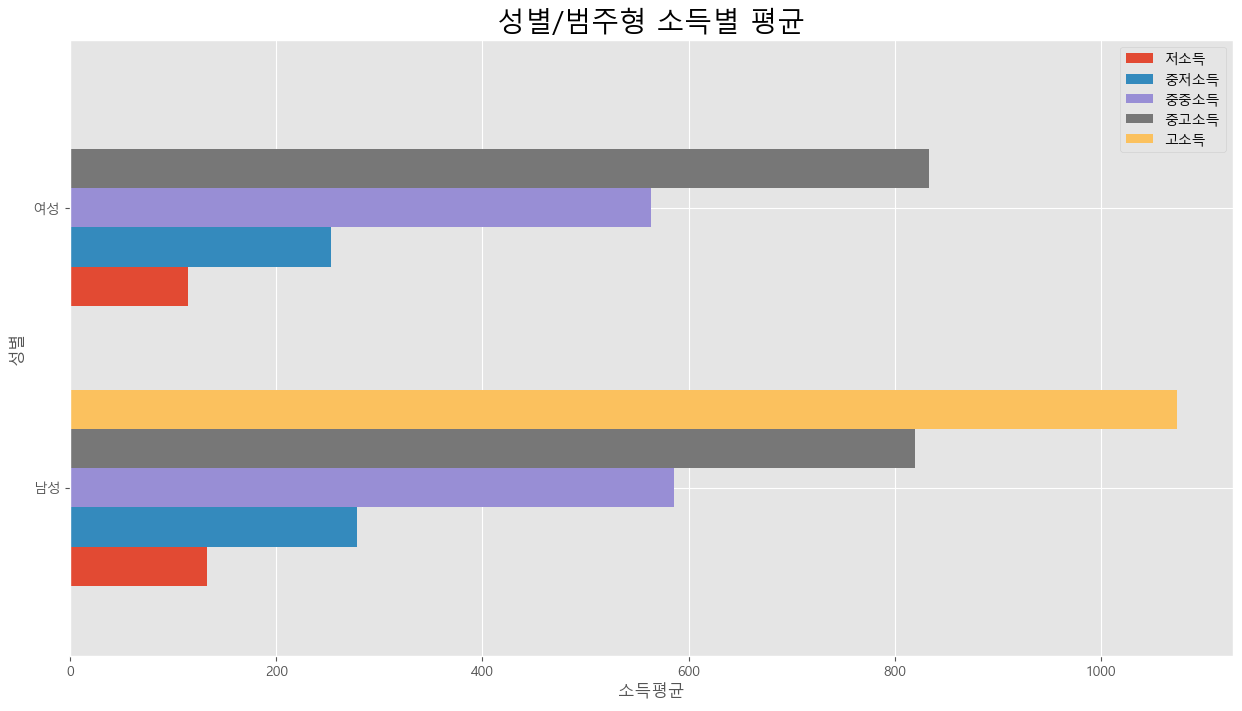

In [163]:
chartdata.plot(kind='barh', figsize=(15,8), width=0.7)

plt.title('성별/범주형 소득별 평균', size=20)
plt.ylabel('성별')
plt.xlabel('소득평균')
plt.legend(loc='best')

In [164]:
payment = pd.read_csv('./../data/payment07.csv', encoding='cp949')
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
1,서문덕,서울,6,영업부,남자,3000,3000
2,이성진,부산,5,영업부,남자,3000,3000
3,강찬혁,부산,3,영업부,남자,1000,2000
4,신유석,서울,5,전산부,여자,2000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
6,이유리,부산,8,전산부,여자,4000,1000
7,선진희,부산,6,전산부,여자,1000,4000


In [165]:
payment['rank']=payment.groupby('부서')['교통비'].rank(method='first', ascending=False)
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비,rank
0,윤장혁,서울,7,영업부,남자,4000,2000,1.0
1,서문덕,서울,6,영업부,남자,3000,3000,2.0
2,이성진,부산,5,영업부,남자,3000,3000,3.0
3,강찬혁,부산,3,영업부,남자,1000,2000,4.0
4,신유석,서울,5,전산부,여자,2000,2000,3.0
5,유지혜,서울,5,전산부,여자,4000,1000,1.0
6,이유리,부산,8,전산부,여자,4000,1000,2.0
7,선진희,부산,6,전산부,여자,1000,4000,4.0


In [166]:
result = payment[payment['rank'] == 1.0]
result

,사원명,출장지역,출장기간,부서,성별,교통비,식비,rank
0,윤장혁,서울,7,영업부,남자,4000,2000,1.0
5,유지혜,서울,5,전산부,여자,4000,1000,1.0


In [167]:
result = result.drop(columns=['rank'])
result

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
